In [281]:
 import cv2
 import numpy as np
 import matplotlib.pyplot as plt
 import tensorflow as tf
 from keras.models import Sequential
 from keras.layers import Dense, Flatten, Dropout, BatchNormalization
 from keras.datasets import fashion_mnist
 from keras import backend as K
 from keras.callbacks import EarlyStopping


In [282]:
 (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [283]:
 num_classes = len(np.unique(y_train))
 num_classes


10

In [284]:
 print(X_train.shape)
 print(y_train.shape)
 print(X_test.shape)
 print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


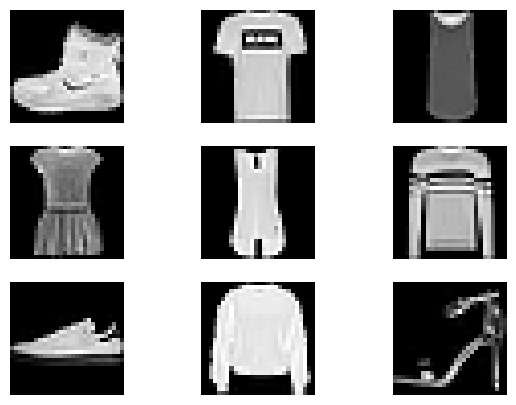

In [285]:
fig, axs = plt.subplots(3, 3, figsize=(7, 5))
cnt = 0
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(X_train[cnt], cmap='gray')
        axs[i, j].axis('off')
        cnt += 1


In [286]:
X_train = X_train.astype(np.float64)/255
X_test = X_test.astype(np.float64)/255

In [287]:
model1 = Sequential()
model1.add(Flatten(input_shape=(28, 28)))
model1.add(Dense(128, 'relu'))
model1.add(Dense(64, 'relu'))
model1.add(Dense(32, 'relu'))
model1.add(Dense(10, 'softmax'))
model1.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_24 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [288]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [289]:
history = model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data= (X_test, y_test), verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7733 - loss: 0.6563 - val_accuracy: 0.8539 - val_loss: 0.4006
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8603 - loss: 0.3791 - val_accuracy: 0.8666 - val_loss: 0.3794
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8757 - loss: 0.3384 - val_accuracy: 0.8624 - val_loss: 0.3853
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8824 - loss: 0.3195 - val_accuracy: 0.8678 - val_loss: 0.3638
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8874 - loss: 0.3017 - val_accuracy: 0.8707 - val_loss: 0.3693
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8954 - loss: 0.2814 - val_accuracy: 0.8756 - val_loss: 0.3407
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8955 - loss: 0.2766 - val_accuracy: 0.8841 - val_loss: 0.3280
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9002 - loss: 0.2632 - 

In [290]:
loss, accuracy = model1.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8777 - loss: 0.3490
Loss: 0.3461349904537201
Accuracy: 0.8766999840736389


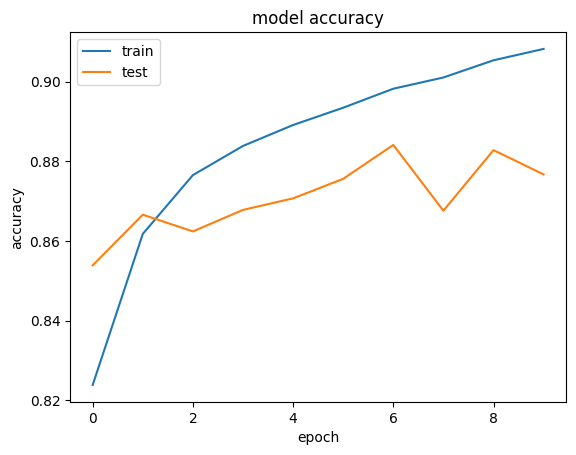

In [291]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

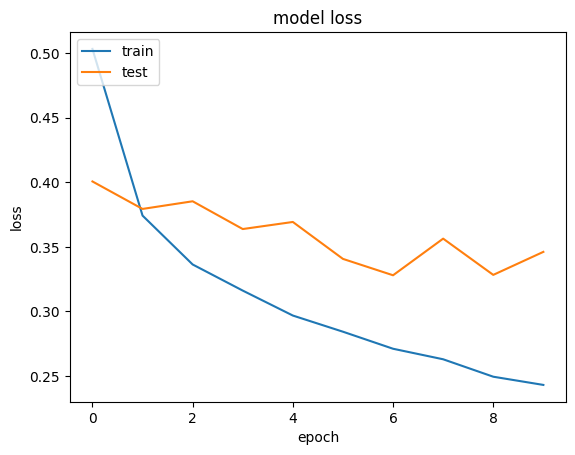

In [292]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [293]:
y_pred = model1.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[8.8024854e-06, 2.8810716e-06, 1.6484657e-06, ..., 5.9658207e-02,
        4.4973814e-07, 9.3784541e-01],
       [3.3861299e-05, 8.3909395e-09, 9.9844271e-01, ..., 1.6643496e-17,
        1.0308996e-07, 1.6922376e-16],
       [1.1068838e-12, 9.9999994e-01, 3.9985372e-12, ..., 8.8579696e-20,
        4.4277013e-15, 1.7013292e-23],
       ...,
       [1.6054971e-08, 4.2327112e-13, 6.7317370e-07, ..., 2.2540374e-10,
        9.9999923e-01, 4.2174255e-12],
       [9.7695496e-09, 9.9997419e-01, 1.7835239e-08, ..., 3.3418210e-10,
        7.0765293e-07, 9.6717414e-14],
       [1.9429617e-06, 6.2395614e-08, 5.2687170e-05, ..., 7.6646003e-04,
        1.1688178e-04, 2.6533886e-05]], dtype=float32)

In [294]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[0]

np.int64(9)

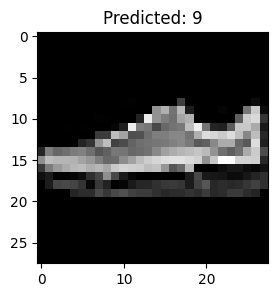

In [295]:
plt.figure(figsize=(3,3))
plt.imshow(X_test[9], cmap='gray')
plt.title(f'Predicted: {y_pred[0]}')
plt.show()

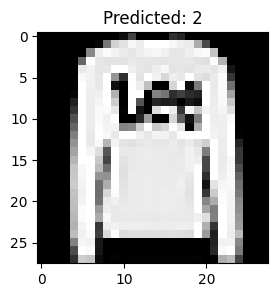

In [296]:
plt.figure(figsize=(3,3))
plt.imshow(X_test[1], cmap='gray')
plt.title(f'Predicted: {y_pred[1]}')
plt.show()

In [297]:
model2 = Sequential()

model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(256, 'relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

model2.add(Dense(128, 'relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

model2.add(Dense(64, 'relu'))
model2.add(BatchNormalization())


model2.add(Dense(10, activation='softmax'))

model2.summary()


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_25 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,554 (955.29 KB)

 Trainable params: 243,658 (951.79 KB)

 Non-trainable params: 896 (3.50 KB)

In [298]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [307]:
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=256, validation_data= (X_test, y_test), verbose=1)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8860 - loss: 0.3100 - val_accuracy: 0.8815 - val_loss: 0.3274
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8907 - loss: 0.2917 - val_accuracy: 0.8826 - val_loss: 0.3308
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8937 - loss: 0.2879 - val_accuracy: 0.8801 - val_loss: 0.3286
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8932 - loss: 0.2856 - val_accuracy: 0.8856 - val_loss: 0.3318
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8967 - loss: 0.2756 - val_accuracy: 0.8794 - val_loss: 0.3358
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8985 - loss: 0.2753 - val_accuracy: 0.8875 - val_loss: 0.3190
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8947 - loss: 0.2751 - val_accuracy: 0.8829 - val_loss: 0.3271
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8955 - loss: 0.2768 - val_accuracy:

In [308]:
loss, accuracy = model2.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8858 - loss: 0.3231
Loss: 0.3216593861579895
Accuracy: 0.8871999979019165


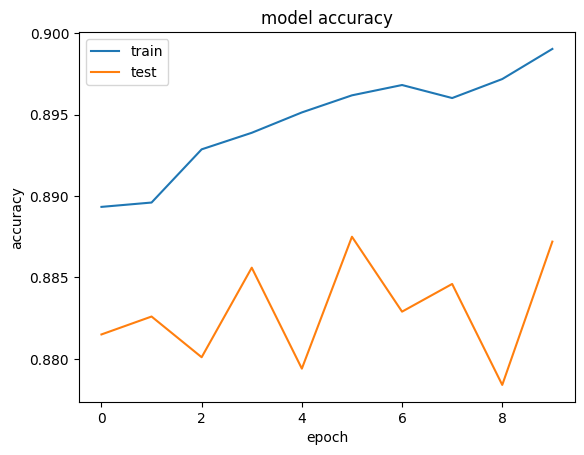

In [310]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

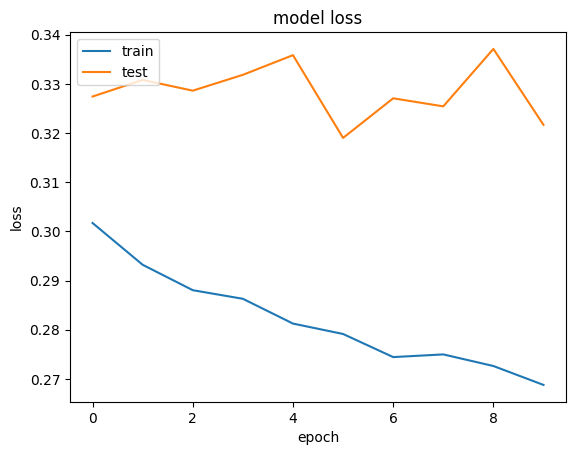

In [311]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [312]:
y_pred = model2.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[9.57722136e-07, 5.87621162e-06, 7.12900032e-07, ...,
        2.54916158e-02, 5.92512424e-06, 9.74067748e-01],
       [4.29072417e-04, 4.81391638e-08, 9.93358791e-01, ...,
        1.30421512e-07, 2.23002166e-06, 3.98781992e-07],
       [2.01946094e-07, 9.99999106e-01, 4.79309179e-08, ...,
        1.18418955e-08, 3.05018659e-08, 1.45703085e-08],
       ...,
       [1.73009175e-03, 1.55134478e-06, 2.36494103e-04, ...,
        1.19598471e-05, 9.97031927e-01, 3.16200681e-06],
       [1.68392972e-07, 9.99984086e-01, 9.73832073e-08, ...,
        1.52057635e-06, 5.81317920e-07, 4.90260436e-06],
       [1.82007071e-07, 3.76709544e-08, 1.61086018e-06, ...,
        7.77281472e-04, 2.01036710e-06, 1.75745372e-05]], dtype=float32)

In [313]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[0]


np.int64(9)

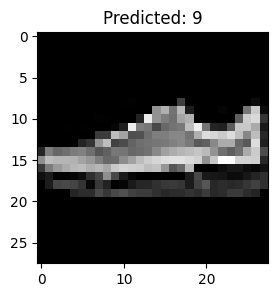

In [314]:
plt.figure(figsize=(3,3))
plt.imshow(X_test[9], cmap='gray')
plt.title(f'Predicted: {y_pred[0]}')
plt.show()

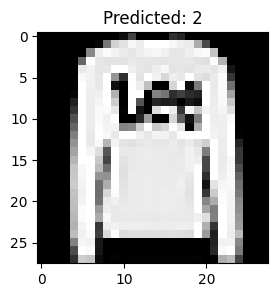

In [315]:
plt.figure(figsize=(3,3))
plt.imshow(X_test[1], cmap='gray')
plt.title(f'Predicted: {y_pred[1]}')
plt.show()